In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, cluster

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Installing weights and biases and logging in 

In [4]:
%%capture
!pip install wandb
import wandb


In [5]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# MLP

**implementation for MNIST**

In [6]:
# Load data
mnist = datasets.fetch_openml('mnist_784')



(70000, 784) (70000,)
(70000, 784) (70000,)
<class 'numpy.ndarray'>
Label is :  0
Label is :  1
Label is :  2
Label is :  3
Label is :  4
Label is :  5
Label is :  6
Label is :  7
Label is :  8
Label is :  9


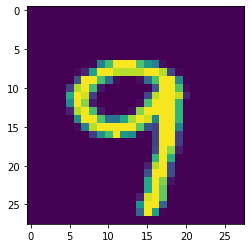

In [7]:
X = pd.DataFrame(mnist.data, columns=mnist.feature_names)
y = mnist.target

print(X.shape,y.shape)

print(X.shape,y.shape)

X = X/255.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

import matplotlib.pyplot as plt

x_train = np.array(X_train)*255
print(type(np.array(x_train)))
a,idx = np.unique(np.array(y_train),return_index=True)
for i in idx:
  print("Label is : ",np.array(y_train)[i])
  plt.imshow(x_train[i].reshape(28,28))



In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,100,150,100,50,), max_iter=10, alpha=1e-4, 
                    solver='sgd', verbose=10, random_state=420, learning_rate_init=.1)
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.64078839
Iteration 2, loss = 0.17961369
Iteration 3, loss = 0.13268994
Iteration 4, loss = 0.10976529
Iteration 5, loss = 0.09678191
Iteration 6, loss = 0.08224033
Iteration 7, loss = 0.07387229
Iteration 8, loss = 0.06882257
Iteration 9, loss = 0.06056940
Iteration 10, loss = 0.05747412


MLPClassifier(hidden_layer_sizes=(50, 100, 150, 100, 50),
              learning_rate_init=0.1, max_iter=10, random_state=420,
              solver='sgd', verbose=10)

In [9]:
print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

0.9855918367346939
0.966047619047619


Initializing Weights and biases

In [10]:
run = wandb.init(project='mnist-class', name="class-1")

wandb: Currently logged in as: vikasmehta. Use `wandb login --relogin` to force relogin


#Plotting the curves in the logged in account

In [11]:
y_pred = mlp.predict(X_test)
y_probas = mlp.predict_proba(X_test)
wandb.sklearn.plot_classifier(mlp, 
                              X_train, X_test, 
                              y_train, y_test, 
                              y_pred, y_probas, 
                              np.unique(y_train), 
                              is_binary=False, 
                              model_name='MLP-MNIST')

wandb.finish()

wandb: 
wandb: Plotting MLP-MNIST.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
wandb: WARNING could not find any of attributes feature_importances_, feature_log_prob_, coef_ on classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
wandb: Logged summary metrics.
wandb: Logged class proportions.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
wandb: WARNING This function only supports binary classification at the moment and